In [128]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [129]:
#read dataset regarding heart_disease
tDataset = pd.read_csv("framingham.csv")
tDataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [130]:
#have to handle null values
tDataset.isnull().sum()

trainDataset=tDataset.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
trainDataset.rename(columns={'male':'Sex'},inplace=True)#1=male #0 = female

print(trainDataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB
None


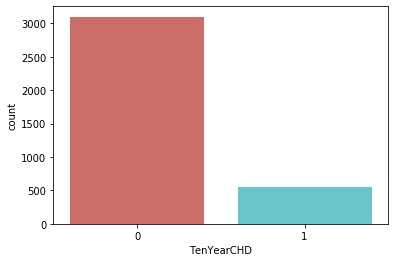

In [131]:
#explore and visualize the target variable
trainDataset.TenYearCHD.value_counts()
sns.countplot(x = 'TenYearCHD', data = trainDataset, palette = 'hls')
plt.show()

In [132]:
#sns.pairplot(data=trainDataset)

In [133]:
#divide the dataset into two halves---a.feature variables---- b.taraget variable

features=['Sex','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
X = trainDataset[features]
y = trainDataset.TenYearCHD

In [134]:
#split data into test and train parts
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [135]:
#train the data model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
#prediction
y_pred=logreg.predict(X_test)

In [137]:
#create the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[604,   5],
       [115,   8]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

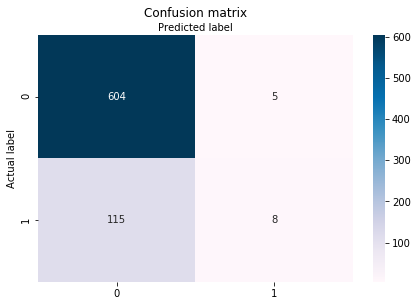

In [138]:
#heat_map of the confusion matrix

values=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(values))
plt.xticks(tick_marks, values)
plt.yticks(tick_marks, values)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [139]:
#calculation of Accuracy Precision and Recall based on the values of Confusion matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8360655737704918
Precision: 0.6153846153846154
Recall: 0.06504065040650407


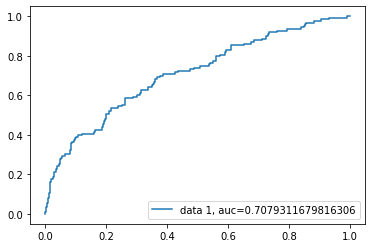

In [140]:
#ROC Curve
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. 
#It shows the tradeoff between sensitivity and specificity.

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
